# BDA-04 Mini project Group 08
## Passenger Satisfaction analysis 
### Group members : 
#### PE25 Ajinkya Karnik - 1032180678
#### PE42 Ansh Joshi - 1032181629
#### PE59 Shubham Shah - 1032191730
#### PD05 Rushikesh Kothawade - 1032180122
#### PD20 Pushkaraj Nimbargi - 1032180711
#### PD Shreyash Shinde -1032170009


## All needed imports

In [38]:
import pandas as pd                      # pandas is a dataframe library
import matplotlib.pyplot as plt          # matpoltlib.pypolt plots data
import numpy as np                       # numpy provides N-dim object support
import seaborn as sns

from sklearn import model_selection
from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics
from sklearn.impute import SimpleImputer      # importing class imputer to replace zero missing values with mean values 
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree, export_text 
from sklearn.neighbors import KNeighborsClassifier

from plotly import __version__
from plotly.graph_objs import FigureWidget
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import cufflinks as cf
cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)

# do plotting inline instead of in a separate window
%matplotlib inline

seed=42

## Load and Review data with converting strings to integers

In [4]:
def conv_binary(cell):
    if(cell == 'satisfied' or cell == 'Loyal Customer' or cell == 'Male' or cell == 'Personal Travel' or cell == 'Eco'):
        return 1
    elif(cell == 'Eco Plus'):
        return 2
    else:
        return 0

def expandRate(dataf, cell):
    return dataf.merge(dataf[cell].apply(lambda s: pd.Series({'Excellent'+cell: int(s > 3), 'Good'+cell: int(1 < s < 4), 'Bad'+cell: int(s < 2)})), 
                        left_index=True, right_index=True)

In [5]:
#loading pima data. Adjust path if necessary
df = pd.read_excel("/Users/ajinkyakarnik/Desktop/tri9/BDA/Mini Project/passenger_satisfaction/satisfaction.xlsx", converters={
    #"satisfaction_v2" : conv_binary,
    "Gender" : conv_binary,
    "Type of Travel" : conv_binary,
    "Class" : conv_binary,
    "Customer Type" : conv_binary
})

df_assoc = df.copy()
# df = pd.read_excel("./satisfaction.xlsx")

In [6]:
df.shape   # number of rows and number of cols

(129880, 24)

In [7]:
df.head(5)  # display data

id satisfaction_v2  Gender  Customer Type  Age  Type of Travel  Class  \
0   11112       satisfied       0              1   65               1      1   
1  110278       satisfied       1              1   47               1      0   
2  103199       satisfied       0              1   15               1      1   
3   47462       satisfied       0              1   60               1      1   
4  120011       satisfied       0              1   70               1      1   

   Flight Distance  Seat comfort  Departure/Arrival time convenient  ...  \
0              265             0                                  0  ...   
1             2464             0                                  0  ...   
2             2138             0                                  0  ...   
3              623             0                                  0  ...   
4              354             0                                  0  ...   

   Online support  Ease of Online booking  On-board service  Leg room service  \
0               2                       3                 3                 0   
1               2                       3                 4                 4   
2               2                       2                 3                 3   
3               3                       1                 1                 0   
4               4                       2                 2                 0   

   Baggage handling  Checkin service  Cleanliness  Online boarding  \
0                 3                5            3                2   
1                 4                2            3                2   
2                 4                4            4                2   
3                 1                4            1                3   
4                 2                4            2                5   

   Departure Delay in Minutes  Arrival Delay in Minutes  
0                           0                       0.0  
1                         310                     305.0  
2                           0                       0.0  
3                           0                       0.0  
4                           0                       0.0  

[5 rows x 24 columns]

In [9]:
df.tail(15)   

id          satisfaction_v2  Gender  Customer Type  Age  \
129865   82526                satisfied       0              0   59   
129866   51023                satisfied       0              0   18   
129867   86234                satisfied       0              0   30   
129868    8518                satisfied       0              0   45   
129869   80330                satisfied       0              0   55   
129870   22432                satisfied       0              0   70   
129871   91851                satisfied       0              0   35   
129872   41573                satisfied       0              0   69   
129873   46936                satisfied       0              0   63   
129874   53969                satisfied       0              0   11   
129875  119211                satisfied       0              0   29   
129876   97768  neutral or dissatisfied       1              0   63   
129877  125368  neutral or dissatisfied       1              0   69   
129878     251  neutral or dissatisfied       1              0   66   
129879   84566  neutral or dissatisfied       0              0   38   

        Type of Travel  Class  Flight Distance  Seat comfort  \
129865               1      1             2641             4   
129866               1      1             1243             5   
129867               1      1             1961             5   
129868               1      1             1612             5   
129869               1      1             1953             5   
129870               1      1             1674             5   
129871               1      1             3287             5   
129872               1      1             2240             5   
129873               1      1             1942             5   
129874               1      1             2752             5   
129875               1      1             1731             5   
129876               1      0             2087             2   
129877               1      1             2320             3   
129878               1      1             2450             3   
129879               1      1             4307             3   

        Departure/Arrival time convenient  ...  Online support  \
129865                                  5  ...               2   
129866                                  0  ...               2   
129867                                  1  ...               5   
129868                                  2  ...               2   
129869                                  2  ...               5   
129870                                  4  ...               5   
129871                                  4  ...               2   
129872                                  4  ...               4   
129873                                  5  ...               3   
129874                                  5  ...               2   
129875                                  5  ...               2   
129876                                  3  ...               1   
129877                                  0  ...               2   
129878                                  2  ...               2   
129879                                  4  ...               3   

        Ease of Online booking  On-board service  Leg room service  \
129865                       2                 1                 5   
129866                       2                 4                 5   
129867                       5                 3                 2   
129868                       2                 2                 5   
129869                       1                 1                 1   
129870                       5                 3                 2   
129871                       2                 4                 5   
129872                       4                 5                 4   
129873                       3                 5                 2   
129874                       2                 3                 5   
129875                 

In [10]:
print("The dataset contains columns of the following data types : \n" + str(df.dtypes))

The dataset contains columns of the following data types : 
id                                     int64
satisfaction_v2                       object
Gender                                 int64
Customer Type                          int64
Age                                    int64
Type of Travel                         int64
Class                                  int64
Flight Distance                        int64
Seat comfort                           int64
Departure/Arrival time convenient      int64
Food and drink                         int64
Gate location                          int64
Inflight wifi service                  int64
Inflight entertainment                 int64
Online support                         int64
Ease of Online booking                 int64
On-board service                       int64
Leg room service                       int64
Baggage handling                       int64
Checkin service                        int64
Cleanliness                            i

**This explanation about this dataset**
* **Satisfaction:** Airline satisfaction level(Satisfaction, neutral or dissatisfaction)
* **Age:** The actual age of the passengers
* **Gender:** Gender of the passengers (Female, Male)
* **Type of Travel:** Purpose of the flight of the passengers (Personal Travel, Business Travel)
* **Class:** Travel class in the plane of the passengers (Business, Eco, Eco Plus)
* **Customer Type:** The customer type (Loyal customer, disloyal customer)
* **Flight distance:** The flight distance of this journey
* **Inflight wifi service:** Satisfaction level of the inflight wifi service (0:Not Applicable;1-5)
* **Ease of Online booking:** Satisfaction level of online booking
* **Inflight service:** Satisfaction level of inflight service
* **Online boarding:** Satisfaction level of online boarding
* **Inflight entertainment:** Satisfaction level of inflight entertainment
* **Food and drink:** Satisfaction level of Food and drink
* **Seat comfort:** Satisfaction level of Seat comfort
* **On-board service:** Satisfaction level of On-board service
* **Leg room service:** Satisfaction level of Leg room service
* **Departure/Arrival time convenient:** Satisfaction level of Departure/Arrival time convenient
* **Baggage handling:** Satisfaction level of baggage handling
* **Gate location:** Satisfaction level of Gate location
* **Cleanliness:** Satisfaction level of Cleanliness
* **Check-in service:** Satisfaction level of Check-in service
* **Departure Delay in Minutes:** Minutes delayed when departure
* **Arrival Delay in Minutes:** Minutes delayed when Arrival

In [11]:
df.isnull().values.any()   # check if there are any null values exist

True

In [12]:
df = df.dropna() # drop all nan values

In [13]:
df.isnull().values.any()   # check if there are any null values exist

False

In [14]:
df.shape

(129487, 24)

In [15]:
df['satisfaction_v2'].value_counts()

satisfied                  70882
neutral or dissatisfied    58605
Name: satisfaction_v2, dtype: int64

<AxesSubplot:xlabel='satisfaction_v2', ylabel='count'>

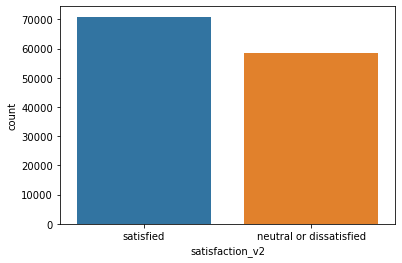

In [16]:
sns.countplot(x='satisfaction_v2',data=df)

In [17]:
df['satisfaction_v2'] = df['satisfaction_v2'].apply(conv_binary)    

In [18]:
df.head()

id  satisfaction_v2  Gender  Customer Type  Age  Type of Travel  Class  \
0   11112                1       0              1   65               1      1   
1  110278                1       1              1   47               1      0   
2  103199                1       0              1   15               1      1   
3   47462                1       0              1   60               1      1   
4  120011                1       0              1   70               1      1   

   Flight Distance  Seat comfort  Departure/Arrival time convenient  ...  \
0              265             0                                  0  ...   
1             2464             0                                  0  ...   
2             2138             0                                  0  ...   
3              623             0                                  0  ...   
4              354             0                                  0  ...   

   Online support  Ease of Online booking  On-board service  Leg room service  \
0               2                       3                 3                 0   
1               2                       3                 4                 4   
2               2                       2                 3                 3   
3               3                       1                 1                 0   
4               4                       2                 2                 0   

   Baggage handling  Checkin service  Cleanliness  Online boarding  \
0                 3                5            3                2   
1                 4                2            3                2   
2                 4                4            4                2   
3                 1                4            1                3   
4                 2                4            2                5   

   Departure Delay in Minutes  Arrival Delay in Minutes  
0                           0                       0.0  
1                         310                     305.0  
2                           0                       0.0  
3                           0                       0.0  
4                           0                       0.0  

[5 rows x 24 columns]

In [19]:
def plot_corr(df, size=24):
    """
    0 -----------------> 1
    Expect a darkred line running from top left to bottom right.
    """
    corr = df.corr()     # dataframe correlation function
    fig, ax = plt.subplots(figsize=(size, size))
    ax.matshow(corr)
    plt.xticks(range(len(corr.columns)), corr.columns)   # draw x tick marks
    plt.yticks(range(len(corr.columns)), corr.columns)   # draw y tick marks

def plot_corr_v2(df):
    fig = plt.figure(figsize=(18,10))
    sns.heatmap(df.corr(),annot=True)
    plt.tight_layout()

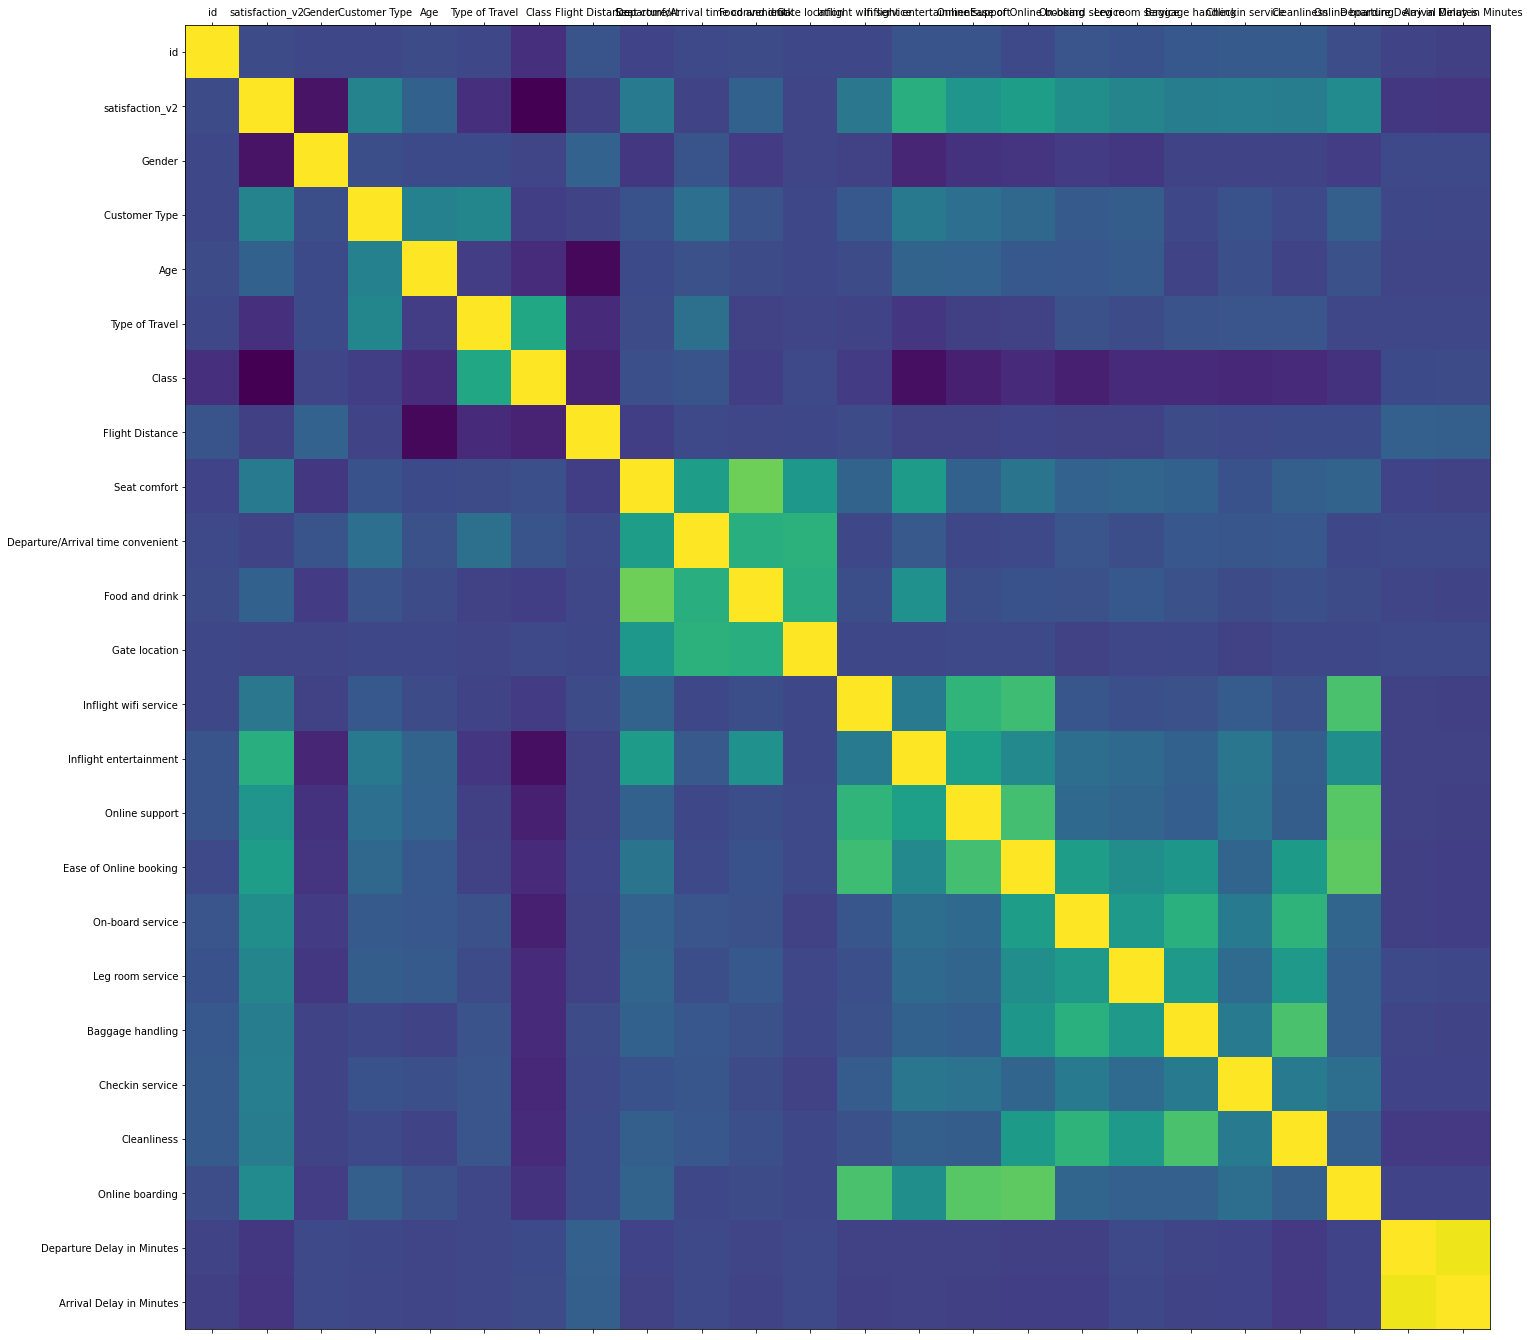

In [20]:
plot_corr(df)

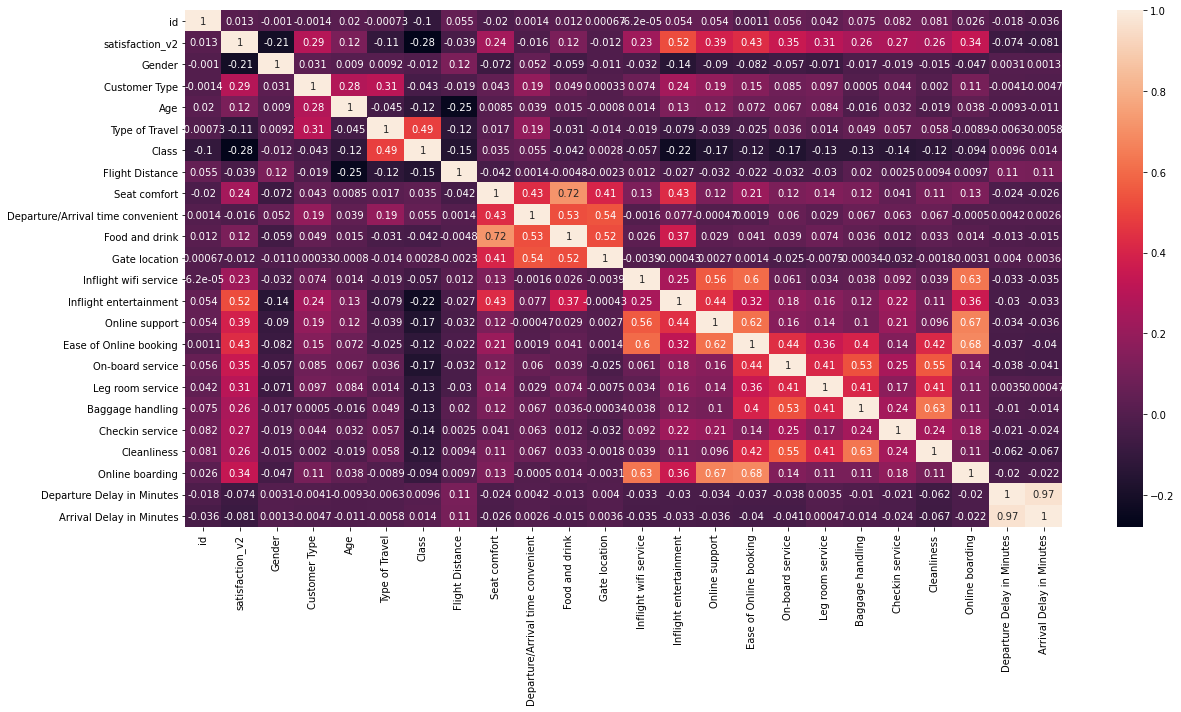

In [21]:
plot_corr_v2(df)

   _From this graph we try using features with correlation more than 0.1 with our target's satisfaction._

<AxesSubplot:>

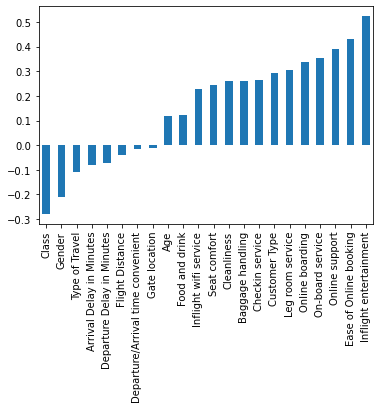

In [22]:
df.corr()['satisfaction_v2'].sort_values().drop(['id','satisfaction_v2']).plot(kind='bar')

In [23]:
df['Inflight entertainment'].value_counts()

4    41752
5    29748
3    24133
2    19118
1    11768
0     2968
Name: Inflight entertainment, dtype: int64

<AxesSubplot:ylabel='Frequency'>

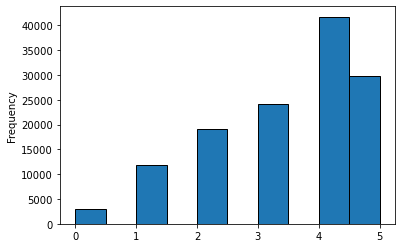

In [24]:
df['Inflight entertainment'].plot(kind='hist',ec='black')

<AxesSubplot:xlabel='satisfaction_v2', ylabel='Inflight entertainment'>

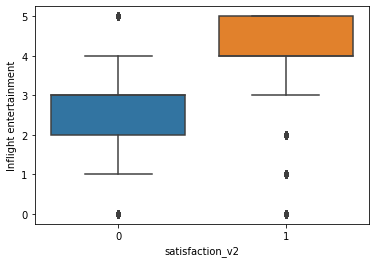

In [25]:
sns.boxplot(x='satisfaction_v2',y = 'Inflight entertainment',data=df)

**_The more satisfied the person is with Inflight entertainment then there are greater chances that the person will be satisfied.<br>Same is the case for all the other correlated parameters._**

Now, let's check the correlation of Inflight entertainment with others.

<AxesSubplot:>

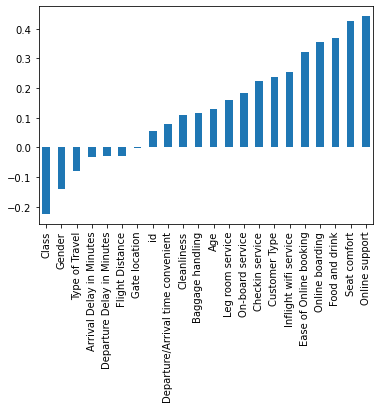

In [26]:
df.corr()['Inflight entertainment'].sort_values().drop(['Inflight entertainment','satisfaction_v2']).plot(kind='bar')

<AxesSubplot:xlabel='Seat comfort', ylabel='Inflight entertainment'>

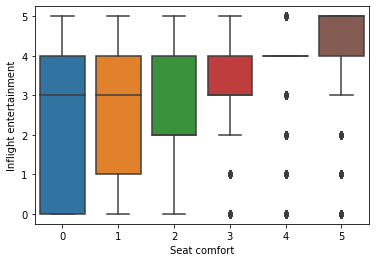

In [27]:
sns.boxplot(x='Seat comfort',y = 'Inflight entertainment',data=df)

_People who gets better seat comfort are likely to have inflight entertainment and gives better rating._

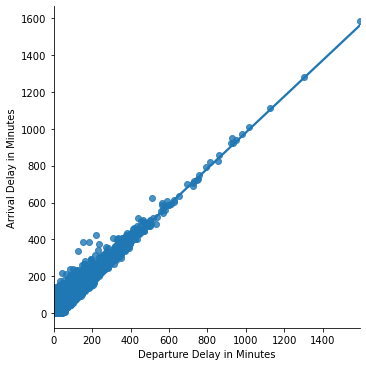

In [28]:
sns.lmplot(x='Departure Delay in Minutes',y='Arrival Delay in Minutes',data=df)

Arrival Delay and Departure delay have a linear relation, so we can drop one column

## Renaming data labels to drop cols 


In [29]:
df.head()

id  satisfaction_v2  Gender  Customer Type  Age  Type of Travel  Class  \
0   11112                1       0              1   65               1      1   
1  110278                1       1              1   47               1      0   
2  103199                1       0              1   15               1      1   
3   47462                1       0              1   60               1      1   
4  120011                1       0              1   70               1      1   

   Flight Distance  Seat comfort  Departure/Arrival time convenient  ...  \
0              265             0                                  0  ...   
1             2464             0                                  0  ...   
2             2138             0                                  0  ...   
3              623             0                                  0  ...   
4              354             0                                  0  ...   

   Online support  Ease of Online booking  On-board service  Leg room service  \
0               2                       3                 3                 0   
1               2                       3                 4                 4   
2               2                       2                 3                 3   
3               3                       1                 1                 0   
4               4                       2                 2                 0   

   Baggage handling  Checkin service  Cleanliness  Online boarding  \
0                 3                5            3                2   
1                 4                2            3                2   
2                 4                4            4                2   
3                 1                4            1                3   
4                 2                4            2                5   

   Departure Delay in Minutes  Arrival Delay in Minutes  
0                           0                       0.0  
1                         310                     305.0  
2                           0                       0.0  
3                           0                       0.0  
4                           0                       0.0  

[5 rows x 24 columns]

In [30]:
# dropping cols
columns = ['Gender', 'Type of Travel', 'Class','Flight Distance', 'Departure/Arrival time convenient', 
           'Gate location', 'Departure Delay in Minutes', 'id', 'Arrival Delay in Minutes']
df.drop(columns, inplace = True, axis=1)

In [31]:
df.shape

(129487, 15)

In [32]:
df.head()

satisfaction_v2  Customer Type  Age  Seat comfort  Food and drink  \
0                1              1   65             0               0   
1                1              1   47             0               0   
2                1              1   15             0               0   
3                1              1   60             0               0   
4                1              1   70             0               0   

   Inflight wifi service  Inflight entertainment  Online support  \
0                      2                       4               2   
1                      0                       2               2   
2                      2                       0               2   
3                      3                       4               3   
4                      4                       3               4   

   Ease of Online booking  On-board service  Leg room service  \
0                       3                 3                 0   
1                       3                 4                 4   
2                       2                 3                 3   
3                       1                 1                 0   
4                       2                 2                 0   

   Baggage handling  Checkin service  Cleanliness  Online boarding  
0                 3                5            3                2  
1                 4                2            3                2  
2                 4                4            4                2  
3                 1                4            1                3  
4                 2                4            2                5

# check true and false ratio

In [33]:
num_true = len(df.loc[df['satisfaction_v2'] == True])   # satisfication statuses are true
num_false = len(df.loc[df['satisfaction_v2'] == False]) # satisfication statuses are false

print("Number of True cases: {0} ({1:2.2f}%)".format(num_true,(num_true/ (num_true + num_false)) * 100))
print("Number of False cases: {0} ({1:2.2f}%)".format(num_false,(num_false/ (num_true + num_false)) * 100))


Number of True cases: 70882 (54.74%)
Number of False cases: 58605 (45.26%)


## renaming the data

In [34]:
df.rename(columns={"Food and drink":'FD',"Online boarding":'OB',
                   'Ease of Online booking':'EOOB','Online support':'OS', 'Baggage handling':'BH', 
                   'Customer Type':'Customer_Type',
                   'Seat comfort':'Seat_comfort',
                  'Inflight wifi service':'Inflight_wifi_service',
                  'Inflight entertainment':'Inflight_entertainment',
                  'On-board service':'On_board_service', 'Leg room service':'Leg_room_service',
                  'Checkin service':'Checkin_service'}
          ,inplace=True)

In [35]:
print("Finally, the dataset contains columns of the following data types : \n" + str(df.dtypes))

Finally, the dataset contains columns of the following data types : 
satisfaction_v2           int64
Customer_Type             int64
Age                       int64
Seat_comfort              int64
FD                        int64
Inflight_wifi_service     int64
Inflight_entertainment    int64
OS                        int64
EOOB                      int64
On_board_service          int64
Leg_room_service          int64
BH                        int64
Checkin_service           int64
Cleanliness               int64
OB                        int64
dtype: object


In [36]:
df.head()

satisfaction_v2  Customer_Type  Age  Seat_comfort  FD  \
0                1              1   65             0   0   
1                1              1   47             0   0   
2                1              1   15             0   0   
3                1              1   60             0   0   
4                1              1   70             0   0   

   Inflight_wifi_service  Inflight_entertainment  OS  EOOB  On_board_service  \
0                      2                       4   2     3                 3   
1                      0                       2   2     3                 4   
2                      2                       0   2     2                 3   
3                      3                       4   3     1                 1   
4                      4                       3   4     2                 2   

   Leg_room_service  BH  Checkin_service  Cleanliness  OB  
0                 0   3                5            3   2  
1                 4   4                2            3   2  
2                 3   4                4            4   2  
3                 0   1                4            1   3  
4                 0   2                4            2   5

## Prepare data for building classification model 

In [39]:
#from sklearn.cross_validation import train_test_split 

feature_col_names = ['Customer_Type', 'Age', 'BH', 
                     'FD', 'Seat_comfort', 'Leg_room_service',
                     'OB','OS','Inflight_wifi_service',
                    'Inflight_entertainment','On_board_service',
                    'Checkin_service','Cleanliness','EOOB']
predicted_class_names = ['satisfaction_v2']


x = df[feature_col_names].values          
y = df[predicted_class_names].values      
split_test_size = 0.30

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=split_test_size, random_state=seed, stratify=y)

                            # test_size = 0.3 is 30% 
models = []
names = []
results = []

In [40]:
print("{0:0.2f}% in training set".format((len(x_train)/len(df.index))*100))
print("{0:0.2f}% in test set".format((len(x_test)/len(df.index))*100))

70.00% in training set
30.00% in test set


In [41]:
print("Original True : {0} ({1:0.2f}%)".format(len(df.loc[df['satisfaction_v2'] == 1]), (len(df.loc[df['satisfaction_v2'] == 1]) / len(df.index))*100))
print("Original False : {0} ({1:0.2f}%)".format(len(df.loc[df['satisfaction_v2'] == 0]), (len(df.loc[df['satisfaction_v2'] == 0]) / len(df.index))*100))
print("")
print("Training True : {0} ({1:0.3f}%)".format(len(y_train[y_train[:] == 1]), (len(y_train[y_train[:] == 1]) / len(y_train) * 100.0 )))
print("Training False : {0} ({1:0.3f}%)".format(len(y_train[y_train[:] == 0]), (len(y_train[y_train[:] == 0]) / len(y_train) * 100.0 )))
print("")
print("Test True : {0} ({1:0.3f}%)".format(len(y_test[y_test[:] == 1]), (len(y_test[y_test[:] == 1]) / len(y_test) * 100.0 )))
print("Test False : {0} ({1:0.3f}%)".format(len(y_test[y_test[:] == 0]), (len(y_test[y_test[:] == 0]) / len(y_test) * 100.0 )))


Original True : 70882 (54.74%)
Original False : 58605 (45.26%)

Training True : 49617 (54.741%)
Training False : 41023 (45.259%)

Test True : 21265 (54.740%)
Test False : 17582 (45.260%)


In [42]:
#from sklearn.preprocessing import Imputer   
#Impute with mean all 0 readings
fill_0 = SimpleImputer(missing_values=0, strategy="mean", verbose=0)  # axis=0 -> col, verbose = axis

x_train = fill_0.fit_transform(x_train)
x_test = fill_0.fit_transform(x_test)

<a id="top"></a>
# Table of Algorithms

1. [Random Forest](#RF)
2. [Decision Tree](#DT)
3. [K-Nearest Neigbors](#KNN)
4. [Logistic Regression](#LR)

<a id='RF'></a>
## 1. Random Forest Algorithm
[Top](#top)

In [50]:
# Create random forest object
rf_model = RandomForestClassifier(random_state=seed, n_estimators=10)  # n_estimators will change from 10 in version 0.20 to 100 in 0.22
rf_model.fit(x_train, y_train.ravel());

models.append(rf_model)
names.append("RF")

In [51]:
# predict values using the training data
rf_predict_train = rf_model.predict(x_train)

acc_train = metrics.accuracy_score(y_train, rf_predict_train)

# predict values using the test data
rf_predict_test = rf_model.predict(x_test)

acc_test = metrics.accuracy_score(y_test, rf_predict_test)

results.append((acc_train, acc_test))

#Accuracy
print("Accuracy on training data: {:.2%}".format(acc_train)) # accuracy on training data
print("Accuracy on testing data: {:.2%}".format(acc_test)) # accuracy on testing data

Accuracy on training data: 99.42%
Accuracy on testing data: 92.84%


Confusion Matrix
[[16438  1144]
 [ 1638 19627]]

Classification Report
              precision    recall  f1-score   support

           0       0.91      0.93      0.92     17582
           1       0.94      0.92      0.93     21265

    accuracy                           0.93     38847
   macro avg       0.93      0.93      0.93     38847
weighted avg       0.93      0.93      0.93     38847



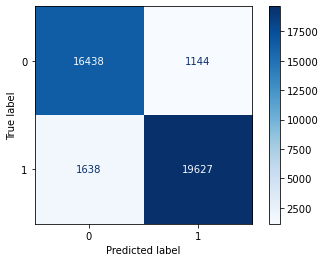

In [70]:
#print("Confucsion Matrix")   # left col predicted false , right predicted true
# plot confusion matrix
confM = metrics.plot_confusion_matrix(rf_model, x_test, y_test, cmap='Blues', values_format='d')
print("Confusion Matrix")
print(confM.confusion_matrix)
print("")
print("Classification Report")
print(metrics.classification_report(y_test, rf_predict_test))

<a id='DT'></a>
## 2. Decision Tree Algorithm
[Top](#top)

In [53]:
# Create Decision Tree object
dt_model = DecisionTreeClassifier(random_state=seed, max_depth=10)
dt_model.fit(x_train, y_train.ravel());

models.append(dt_model)
names.append("DT")

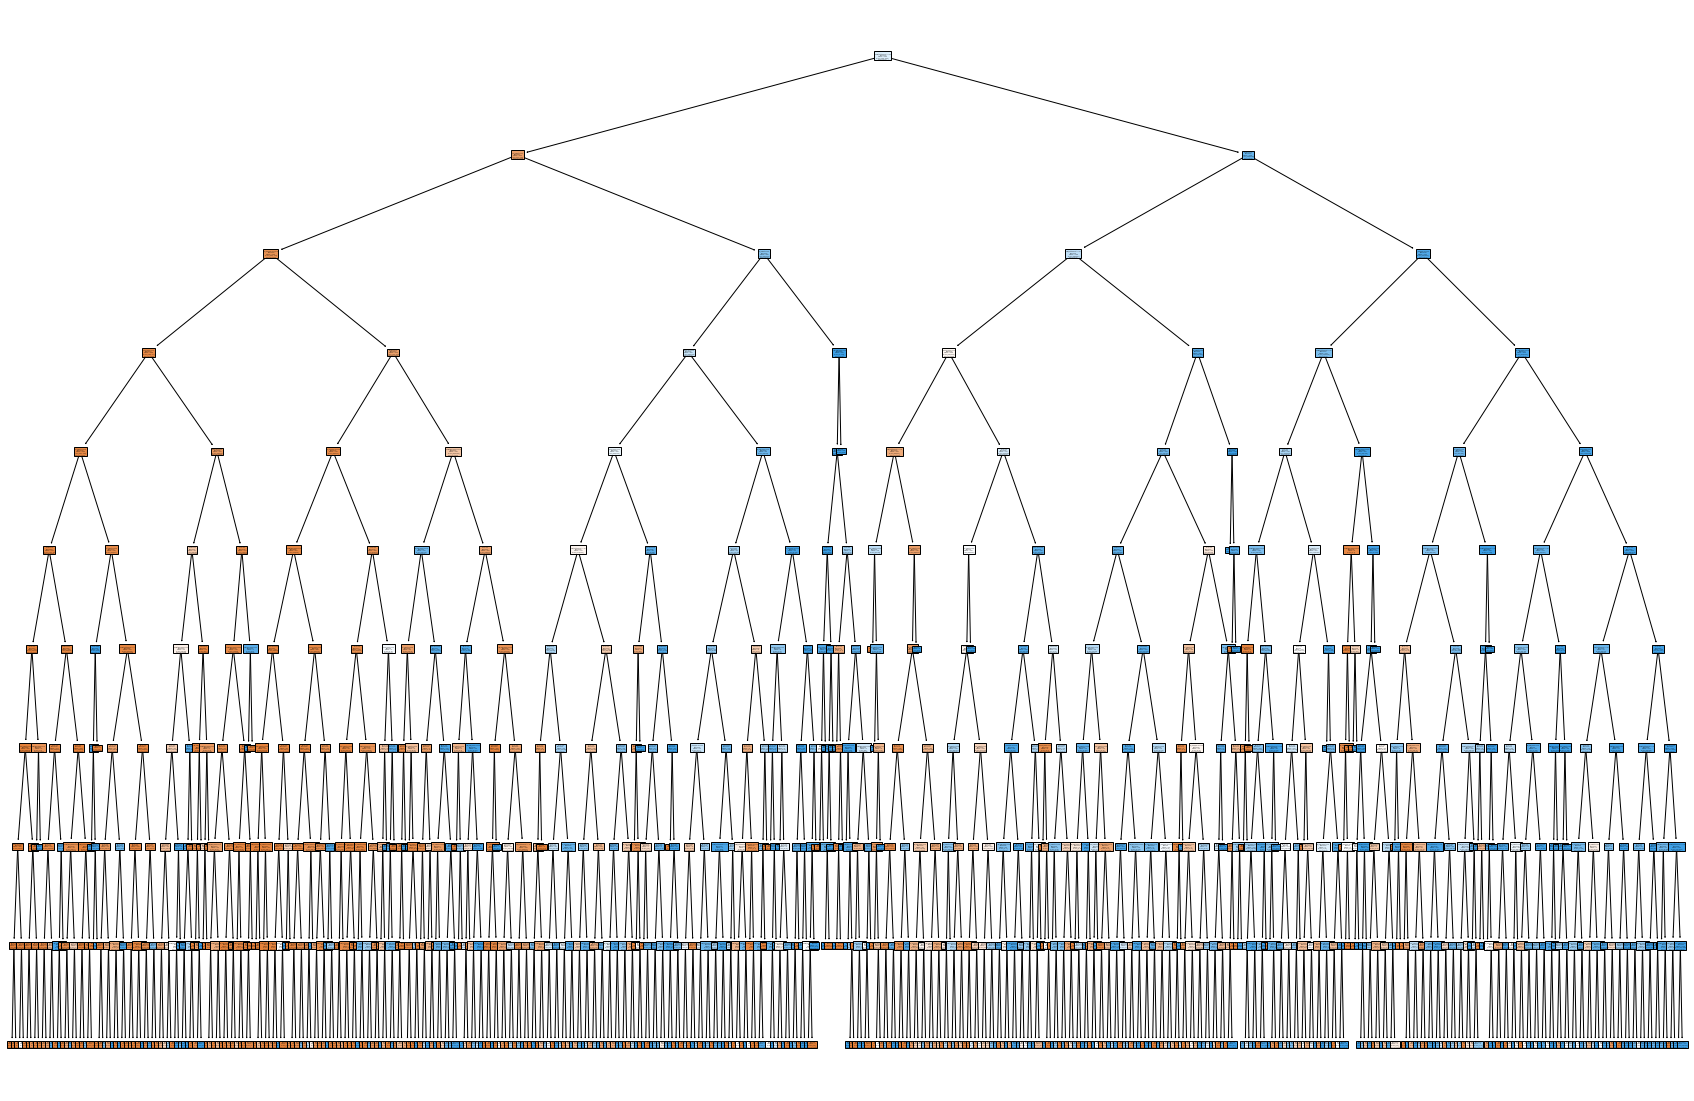

In [54]:
plt.figure(figsize=(30, 20))
plot_tree(dt_model, feature_names=feature_col_names, class_names=['dissatisfied', 'Satisfied'], filled=True);

In [55]:
# predict values using the training data
dt_predict_train = dt_model.predict(x_train)

acc_train = metrics.accuracy_score(y_train, dt_predict_train)

# predict values using the test data
dt_predict_test = dt_model.predict(x_test)

acc_test = metrics.accuracy_score(y_test, dt_predict_test)

results.append((acc_train, acc_test))

#Accuracy
print("Accuracy on training data: {:.2%}".format(acc_train)) # accuracy on training data
print("Accuracy on testing data: {:.2%}".format(acc_test)) # accuracy on testing data

Accuracy on training data: 91.50%
Accuracy on testing data: 90.66%


Confucsion Matrix
[[15705  1877]
 [ 1750 19515]]

Classification Report
              precision    recall  f1-score   support

           0       0.90      0.89      0.90     17582
           1       0.91      0.92      0.91     21265

    accuracy                           0.91     38847
   macro avg       0.91      0.91      0.91     38847
weighted avg       0.91      0.91      0.91     38847



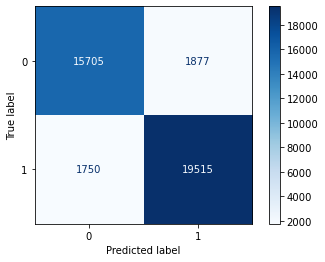

In [56]:
#print("Confucsion Matrix")   # left col predicted false , right predicted true
#print("{0}".format(metrics.confusion_matrix(y_test, dt_predict_test)))
# plot confusion matrix
confM = metrics.plot_confusion_matrix(dt_model, x_test, y_test, cmap='Blues', values_format='d')
print("Confucsion Matrix")
print(confM.confusion_matrix)
print("")
print("Classification Report")
print(metrics.classification_report(y_test, dt_predict_test))

<a id='KNN'></a>
## 3. K-Nearest Neighbors Algorithm
[Top](#top)

In [57]:
# Create KNeighbors object
knn_model = KNeighborsClassifier() # weights = 'distance' make the training accuracy 100% but doesn't make difference on testing data
knn_model.fit(x_train, y_train.ravel());

models.append(knn_model)
names.append("KNN")

In [58]:
# predict values using the training data
knn_predict_train = knn_model.predict(x_train)

acc_train = metrics.accuracy_score(y_train, knn_predict_train)

# predict values using the test data
knn_predict_test = knn_model.predict(x_test)

acc_test = metrics.accuracy_score(y_test, knn_predict_test)

results.append((acc_train, acc_test))

#Accuracy
print("Accuracy on training data: {:.2%}".format(acc_train)) # accuracy on training data
print("Accuracy on testing data: {:.2%}".format(acc_test)) # accuracy on testing data

Accuracy on training data: 91.29%
Accuracy on testing data: 87.44%


Confucsion Matrix
[[15575  2007]
 [ 2873 18392]]

Classification Report
              precision    recall  f1-score   support

           0       0.84      0.89      0.86     17582
           1       0.90      0.86      0.88     21265

    accuracy                           0.87     38847
   macro avg       0.87      0.88      0.87     38847
weighted avg       0.88      0.87      0.87     38847



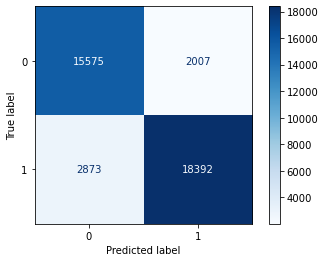

In [59]:
#print("Confucsion Matrix")   # left col predicted false , right predicted true
#print("{0}".format(metrics.confusion_matrix(y_test, knn_predict_test)))
# plot confusion matrix
confM = metrics.plot_confusion_matrix(knn_model, x_test, y_test, cmap='Blues', values_format='d')
print("Confucsion Matrix")
print(confM.confusion_matrix)
print("")
print("Classification Report")
print(metrics.classification_report(y_test, knn_predict_test))

<a id='LR'></a>
## 4. Logistic Regression Algorithm
[Top](#top)

In [60]:
# Create LogisticRegression object
lr_model = LogisticRegression(random_state=seed, max_iter=10000) 
lr_model.fit(x_train, y_train.ravel());

models.append(lr_model)
names.append("LR")

In [61]:
# predict values using the training data
lr_predict_train = lr_model.predict(x_train)

acc_train = metrics.accuracy_score(y_train, lr_predict_train)

# predict values using the test data
lr_predict_test = lr_model.predict(x_test)

acc_test = metrics.accuracy_score(y_test, lr_predict_test)

results.append((acc_train, acc_test))

#Accuracy
print("Accuracy on training data: {:.2%}".format(acc_train)) # accuracy on training data
print("Accuracy on testing data: {:.2%}".format(acc_test)) # accuracy on testing data

Accuracy on training data: 82.04%
Accuracy on testing data: 81.94%


Confucsion Matrix
[[13693  3889]
 [ 3126 18139]]

Classification Report
              precision    recall  f1-score   support

           0       0.81      0.78      0.80     17582
           1       0.82      0.85      0.84     21265

    accuracy                           0.82     38847
   macro avg       0.82      0.82      0.82     38847
weighted avg       0.82      0.82      0.82     38847



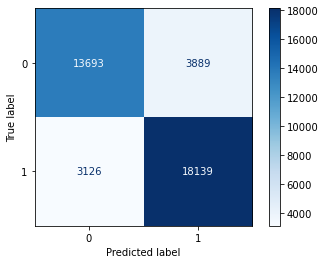

In [62]:
#print("Confucsion Matrix")   # left col predicted false , right predicted true
#print("{0}".format(metrics.confusion_matrix(y_test, lr_predict_test)))
# plot confusion matrix
confM = metrics.plot_confusion_matrix(lr_model, x_test, y_test, cmap='Blues', values_format='d')
print("Confucsion Matrix")
print(confM.confusion_matrix)
print("")
print("Classification Report")
print(metrics.classification_report(y_test, lr_predict_test))

## Algorithms accuracies comparison graph

NB: 0.796293 (0.004593)
RF: 0.927526 (0.002206)
DT: 0.906520 (0.001548)
KNN: 0.876015 (0.004240)
LR: 0.820256 (0.004958)
GB: 0.848058 (0.004521)


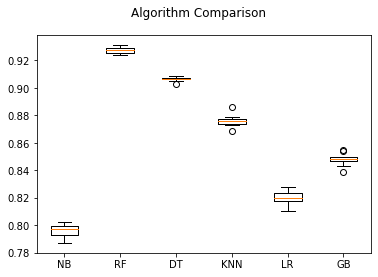

In [69]:

results_ = []
scoring = 'accuracy'
for i, model in enumerate(models):
    kfold = model_selection.KFold(n_splits=10)
    cv_results = None
    if not i:
        cv_results = model_selection.cross_val_score(models[0], x_train_cat, y_train_cat.ravel(), cv=kfold, scoring=scoring)
        results_.append(cv_results)
    else:
        cv_results = model_selection.cross_val_score(model, x_train, y_train.ravel(), cv=kfold, scoring=scoring)
        results_.append(cv_results)
    msg = "%s: %f (%f)" % (names[i], cv_results.mean(), cv_results.std())
    print(msg)
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results_)
ax.set_xticklabels(names)
plt.show()

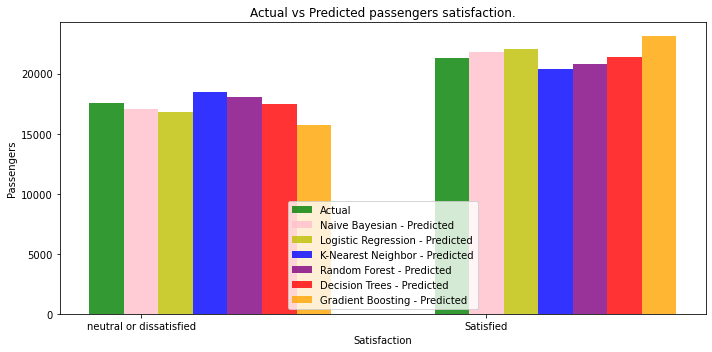

In [67]:
uniqueValues, occurCount = np.unique(y_test, return_counts=True)
frequency_actual = (occurCount[0], occurCount[1])

uniqueValues, occurCount = np.unique(knn_predict_test, return_counts=True)
frequency_predicted_knn = (occurCount[0], occurCount[1])

uniqueValues, occurCount = np.unique(dt_predict_test, return_counts=True)
frequency_predicted_dt = (occurCount[0], occurCount[1])

uniqueValues, occurCount = np.unique(rf_predict_test, return_counts=True)
frequency_predicted_rf = (occurCount[0], occurCount[1])

uniqueValues, occurCount = np.unique(lr_predict_test, return_counts=True)
frequency_predicted_lr = (occurCount[0], occurCount[1])

uniqueValues, occurCount = np.unique(nb_predict_test, return_counts=True)
frequency_predicted_nb = (occurCount[0], occurCount[1])

uniqueValues, occurCount = np.unique(gb_predict_test, return_counts=True)
frequency_predicted_gb = (occurCount[0], occurCount[1])

n_groups = 2
fig, ax = plt.subplots(figsize=(10,5))
index = np.arange(n_groups)
bar_width = 0.1
opacity = 0.8

rects1 = plt.bar(index, frequency_actual, bar_width,
alpha=opacity,
color='g',
label='Actual')

rects2 = plt.bar(index + bar_width, frequency_predicted_nb, bar_width,
alpha=opacity,
color='pink',
label='Naive Bayesian - Predicted')

rects3 = plt.bar(index + bar_width*2, frequency_predicted_lr, bar_width,
alpha=opacity,
color='y',
label='Logistic Regression - Predicted')

rects4 = plt.bar(index + bar_width*3, frequency_predicted_knn, bar_width,
alpha=opacity,
color='b',
label='K-Nearest Neighbor - Predicted')

rects5 = plt.bar(index + bar_width*4, frequency_predicted_rf, bar_width,
alpha=opacity,
color='purple',
label='Random Forest - Predicted')

rects6 = plt.bar(index + bar_width*5, frequency_predicted_dt, bar_width,
alpha=opacity,
color='red',
label='Decision Trees - Predicted')

rects7 = plt.bar(index + bar_width*6, frequency_predicted_gb, bar_width,
alpha=opacity,
color='orange',
label='Gradient Boosting - Predicted')

plt.xlabel('Satisfaction')
plt.ylabel('Passengers')
plt.title('Actual vs Predicted passengers satisfaction.')
plt.xticks(index + bar_width, ('neutral or dissatisfied', 'Satisfied'))
plt.legend()

plt.tight_layout()
plt.show()

## Exporting data to a csv form

In [68]:
df.to_csv(r'Passenger_satisfaction_processed.csv')